<a href="https://colab.research.google.com/github/mohamedssafini/default_of_credit_card/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [1]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Seaborn version is {}.\n'.format(sns.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0].

The Numpy version is 1.21.6.

The Pandas version is 1.3.5.

The Matplotlib version is 3.2.2.

The Seaborn version is 0.11.2.

The Scikit-Learn version is 1.0.2.



In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [3]:
df = pd.read_csv('drive/MyDrive/Chapter_1_cleaned_data.csv')

In [4]:
features_response = df.columns.tolist()

In [5]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [6]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [7]:
df['EDUCATION']

0        2
1        2
2        2
3        2
4        2
        ..
26659    3
26660    3
26661    2
26662    3
26663    2
Name: EDUCATION, Length: 26664, dtype: int64

In [8]:
items_to_remove = ['ID', 'SEX',
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT',
                   'graduate school', 'high school', 'none',
                   'others', 'university']

In [9]:
features_response = [item for item in features_response if item not in items_to_remove]

In [10]:
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [11]:
corr = df[features_response].corr()

In [12]:
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365
BILL_AMT1,0.287009,0.016156,-0.028610,0.056245,0.185826,1.000000,0.951651,0.900386,0.860149,0.828615,0.802008,0.138221,0.112460,0.145635,0.160204,0.163425,0.178943,-0.020508
BILL_AMT2,0.279289,0.012307,-0.026009,0.054099,0.188799,0.951651,1.000000,0.937488,0.892103,0.858078,0.830300,0.276583,0.114473,0.137514,0.148685,0.153851,0.172472,-0.014579
BILL_AMT3,0.285299,0.007683,-0.029192,0.054107,0.181257,0.900386,0.937488,1.000000,0.930385,0.889186,0.855154,0.242809,0.287837,0.119456,0.141010,0.159446,0.178121,-0.014649
BILL_AMT4,0.294342,-0.005862,-0.027740,0.051241,0.178812,0.860149,0.892103,0.930385,1.000000,0.937799,0.899241,0.229123,0.217716,0.293652,0.131700,0.158633,0.171339,-0.011349
BILL_AMT5,0.295198,-0.013174,-0.029895,0.049701,0.180438,0.828615,0.858078,0.889186,0.937799,1.000000,0.945671,0.212053,0.189566,0.241291,0.296192,0.140669,0.161847,-0.006753


In [13]:
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


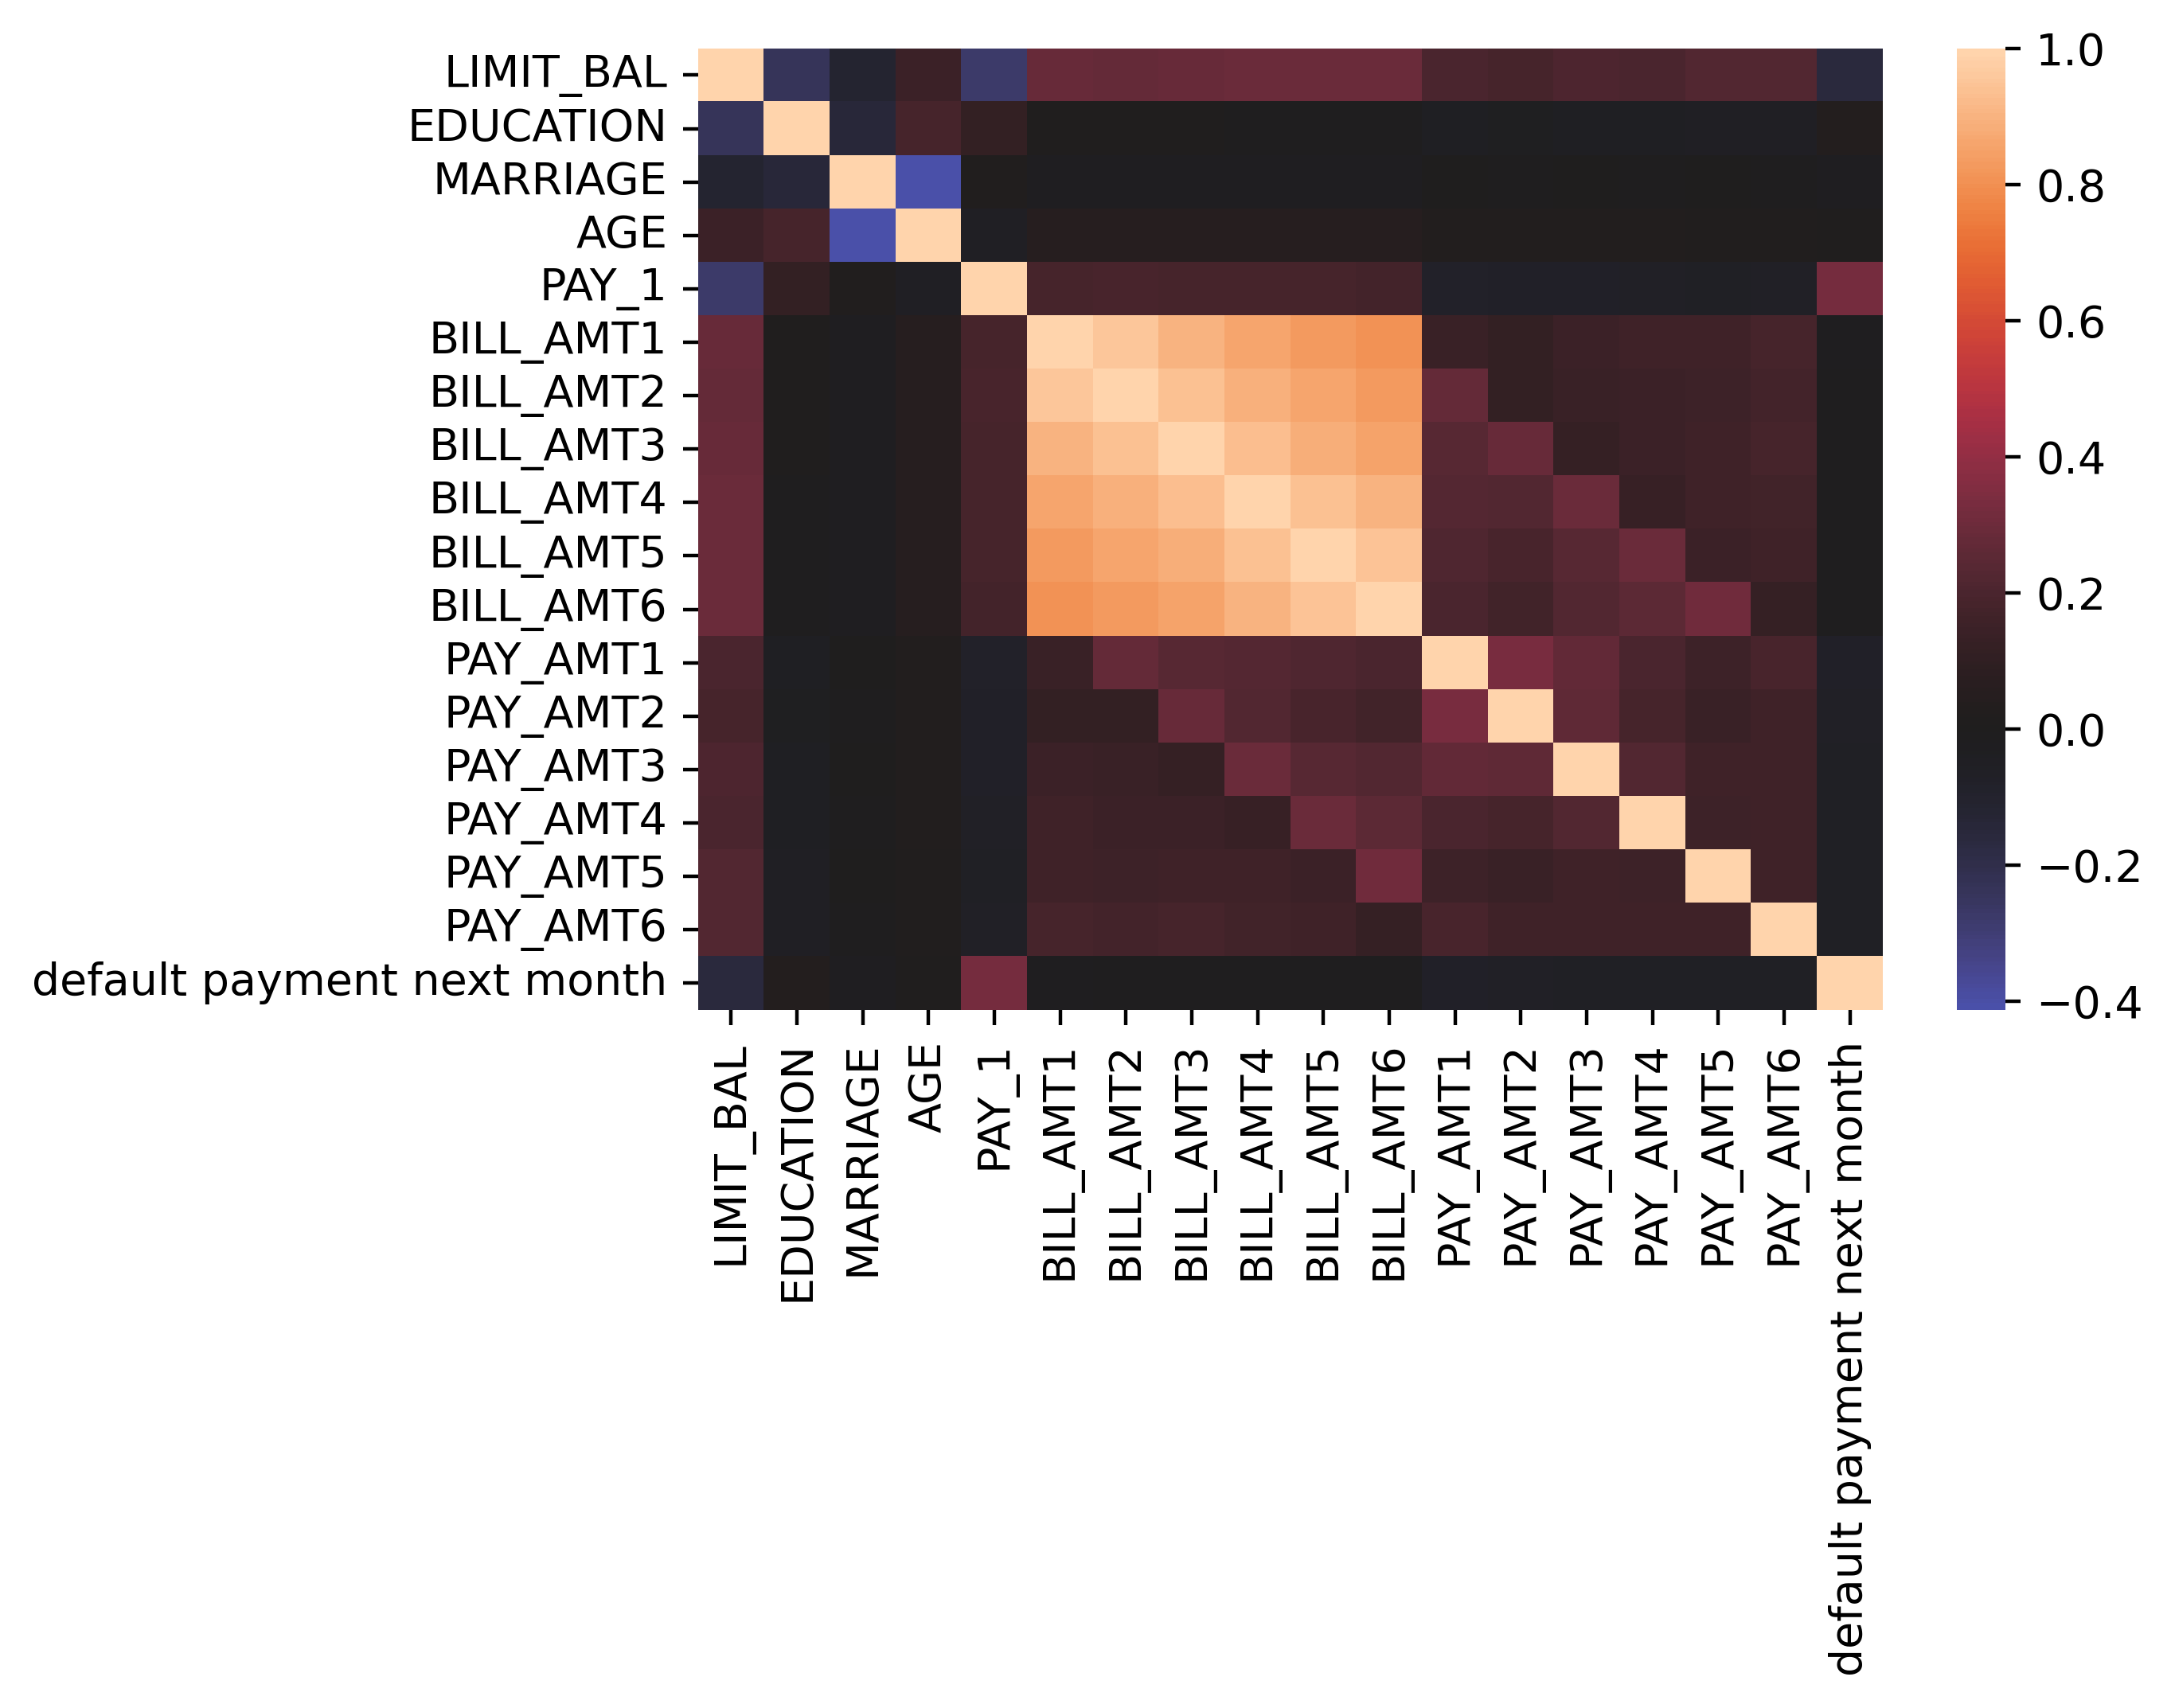

In [14]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

**F-test and Univariate Feature Selection**

In [15]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [16]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [17]:
X

array([[ 20000,      2,      1, ...,      0,      0,      0],
       [120000,      2,      2, ...,   1000,      0,   2000],
       [ 90000,      2,      2, ...,   1000,   1000,   5000],
       ...,
       [ 30000,      2,      2, ...,   4200,   2000,   3100],
       [ 80000,      3,      1, ...,   1926,  52964,   1804],
       [ 50000,      2,      1, ...,   1000,   1000,   1000]])

In [18]:
from sklearn.feature_selection import f_classif

In [19]:
[f_stat, f_p_value] = f_classif(X, y)

In [20]:
f_stat

array([6.51324071e+02, 3.26377679e+01, 1.80780265e+01, 5.47913953e+00,
       3.15667230e+03, 1.12184060e+01, 5.66845420e+00, 5.72293789e+00,
       3.43474047e+00, 1.21608188e+00, 1.04956059e+00, 1.40612679e+02,
       1.01408321e+02, 9.00238734e+01, 7.96400211e+01, 8.58432945e+01,
       8.04207840e+01])

In [21]:
f_p_value

array([5.83836587e-142, 1.12217491e-008, 2.12755520e-005, 1.92520602e-002,
       0.00000000e+000, 8.11022595e-004, 1.72796505e-002, 1.67515708e-002,
       6.38496543e-002, 2.70140911e-001, 3.05617603e-001, 2.35835447e-032,
       8.25612412e-024, 2.54264104e-021, 4.77411188e-019, 2.09011996e-020,
       3.21956535e-019])

In [22]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [23]:
from sklearn.feature_selection import SelectPercentile

In [24]:
selector = SelectPercentile(f_classif, percentile=20)

In [25]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [26]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [27]:
features = features_response[:-1]

In [28]:
best_features = [features[counter]
                 for counter in range(len(features))
                 if best_feature_ix[counter]]

In [29]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']